In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shap
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data\Data.csv')
data.tail()

,Pysics,Science,Statistics,Math
461,75,91,57,73
462,85,74,74,67
463,65,65,83,85
464,76,91,71,82
465,74,68,85,67


In [5]:
data.isnull().sum()

Pysics        0
Science       0
Statistics    0
Math          0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pysics,466.0,71.742489,16.033238,0.0,66.00,74.0,82.0,99.0
Science,466.0,72.813305,14.270110,0.0,66.00,74.0,83.0,99.0
Statistics,466.0,73.682403,12.180806,22.0,66.25,74.0,83.0,100.0
Math,466.0,74.540773,11.424528,22.0,67.00,74.0,83.0,99.0


In [7]:
print("Number of student: ", len(data))

Number of student:  466


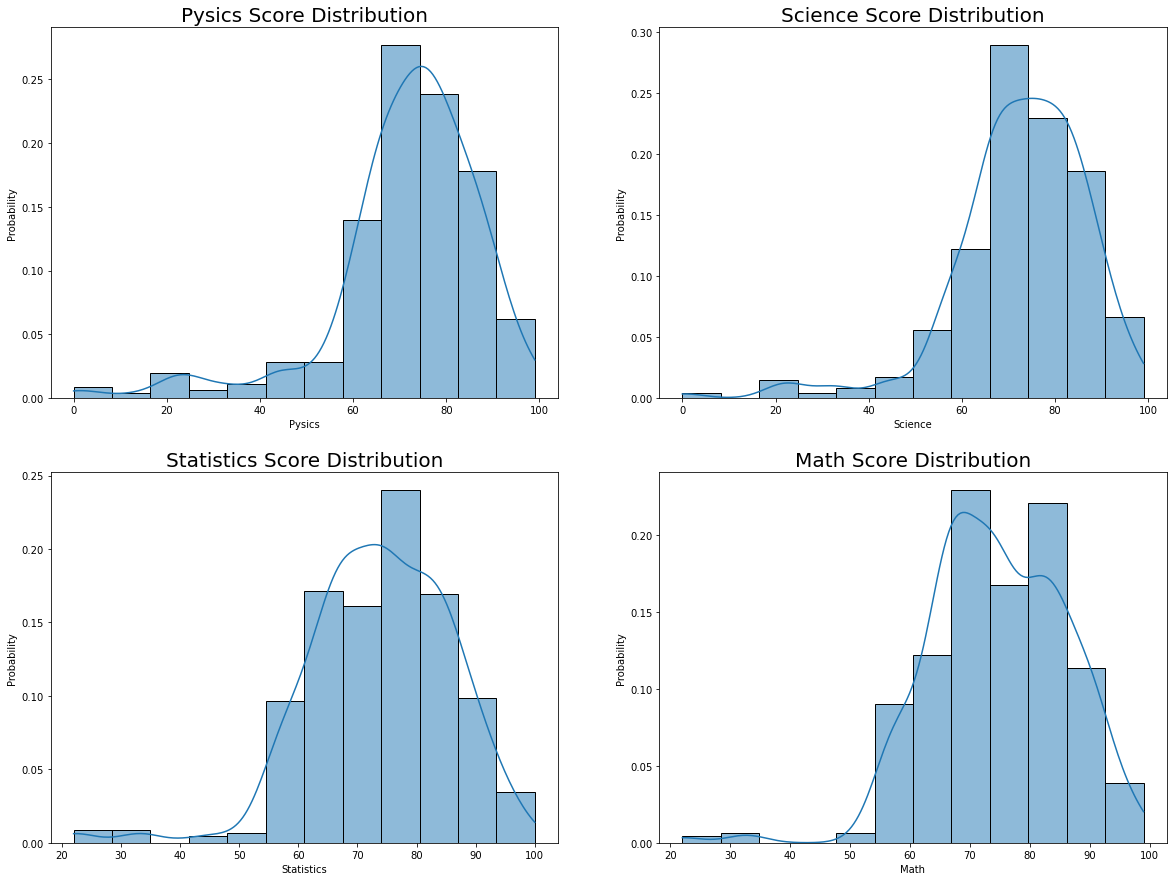

In [8]:
fig, ax=plt.subplots(2,2 ,figsize=(20,15))
sns.histplot(data=data, x='Pysics', kde=True, stat='probability', bins=12, ax=ax[0,0])
ax[0,0].set_title("Pysics Score Distribution", size=20)
sns.histplot(data=data, x='Science', kde=True, stat='probability', bins=12, ax=ax[0,1])
ax[0,1].set_title("Science Score Distribution", size=20)
sns.histplot(data=data, x='Statistics', kde=True, stat='probability', bins=12, ax=ax[1,0])
ax[1,0].set_title("Statistics Score Distribution", size=20)
sns.histplot(data=data, x='Math', kde=True, stat='probability', bins=12, ax=ax[1,1])
ax[1,1].set_title("Math Score Distribution", size=20)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.close(0)
plt.show()

In [9]:
data.skew(axis=0)

Pysics       -1.664994
Science      -1.443609
Statistics   -0.849626
Math         -0.561298
dtype: float64

In [10]:
data.kurt(axis=0)

Pysics        4.224896
Science       4.173907
Statistics    2.238504
Math          1.648008
dtype: float64

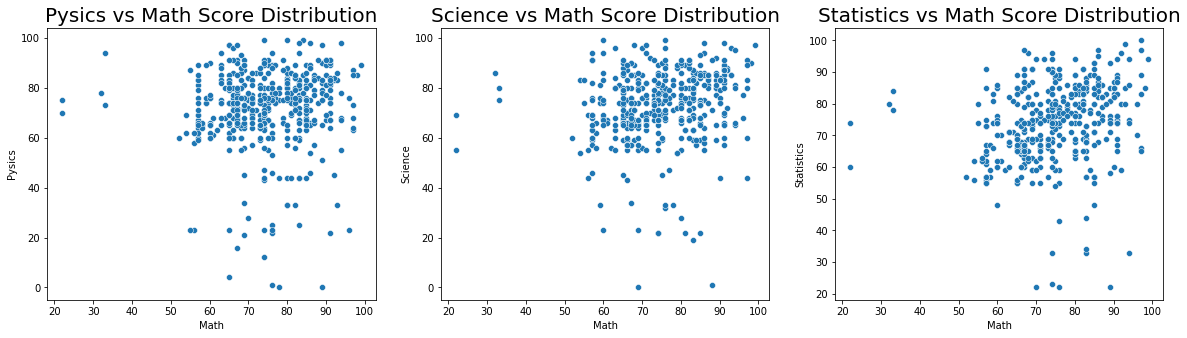

In [11]:
fig, ax=plt.subplots(1,3 ,figsize=(20,5))
sns.scatterplot(data=data, x='Math' , y='Pysics', ax=ax[0])
ax[0].set_title("Pysics vs Math Score Distribution", size=20)
sns.scatterplot(data=data, x='Math' , y='Science', ax=ax[1])
ax[1].set_title("Science vs Math Score Distribution", size=20)
sns.scatterplot(data=data, x='Math' , y='Statistics', ax=ax[2])
ax[2].set_title("Statistics vs Math Score Distribution", size=20)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.close(0)
plt.show()

In [12]:
corr = round(data.corr(method='pearson'), 3)
corr

,Pysics,Science,Statistics,Math
Pysics,1.000,0.088,0.075,0.053
Science,0.088,1.000,0.163,0.154
Statistics,0.075,0.163,1.000,0.227
Math,0.053,0.154,0.227,1.000


<AxesSubplot:>

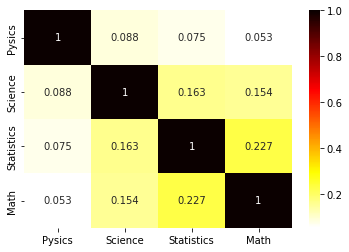

In [13]:
# plot correlation among columns
sns.heatmap(corr, cmap='hot_r', annot=True, fmt='g')

In [14]:
upper_limit_py = data['Pysics'].mean() + 3*data['Pysics'].std()
lower_limit_py = data['Pysics'].mean() - 3*data['Pysics'].std()
upper_limit_sc = data['Science'].mean() + 3*data['Science'].std()
lower_limit_sc = data['Science'].mean() - 3*data['Science'].std()
upper_limit_st = data['Statistics'].mean() + 3*data['Statistics'].std()
lower_limit_st = data['Statistics'].mean() - 3*data['Statistics'].std()
upper_limit_mt = data['Math'].mean() + 3*data['Math'].std()
lower_limit_mt = data['Math'].mean() - 3*data['Math'].std()

print("The boundaries for the outliers are as follows:\n")
print("Upper boundary Pysics: ",np.round(upper_limit_py, 2))
print("Lower boundary Pysics: ",np.round(lower_limit_py, 2))
print('\n')
print("Upper boundary Science: ",np.round(upper_limit_sc, 2))
print("Lower boundary Science: ",np.round(lower_limit_sc, 2))
print('\n')
print("Upper boundary Statistics: ",np.round(upper_limit_st, 2))
print("Lower boundary Statistics: ",np.round(lower_limit_st, 2))
print('\n')
print("Upper boundary Math: ",np.round(upper_limit_mt, 2))
print("Lower boundary Math: ",np.round(lower_limit_mt, 2))

The boundaries for the outliers are as follows:

Upper boundary Pysics:  119.84
Lower boundary Pysics:  23.64


Upper boundary Science:  115.62
Lower boundary Science:  30.0


Upper boundary Statistics:  110.22
Lower boundary Statistics:  37.14


Upper boundary Math:  108.81
Lower boundary Math:  40.27


In [15]:
upper_py = np.where(data['Pysics'] > upper_limit_py)
lower_py = np.where(data['Pysics'] < lower_limit_py)
data.drop(upper_py[0], inplace = True)
data.drop(lower_py[0], inplace = True)
data = data.reset_index(drop=True)

upper_sc = np.where(data['Science'] > upper_limit_sc)
lower_sc = np.where(data['Science'] < lower_limit_sc)
data.drop(upper_sc[0], inplace = True)
data.drop(lower_sc[0], inplace = True)
data = data.reset_index(drop=True)

upper_st = np.where(data['Statistics'] > upper_limit_st)
lower_st = np.where(data['Statistics'] < lower_limit_st)
data.drop(upper_st[0], inplace = True)
data.drop(lower_st[0], inplace = True)
data = data.reset_index(drop=True)

upper_mt = np.where(data['Math'] > upper_limit_mt)
lower_mt = np.where(data['Math'] < lower_limit_mt)
data.drop(upper_mt[0], inplace = True)
data.drop(lower_mt[0], inplace = True)
data = data.reset_index(drop=True)

In [16]:
print("New Shape: ", data.shape)
data

New Shape:  (430, 4)


,Pysics,Science,Statistics,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82
...,...,...,...,...
425,75,91,57,73
426,85,74,74,67
427,65,65,83,85
428,76,91,71,82


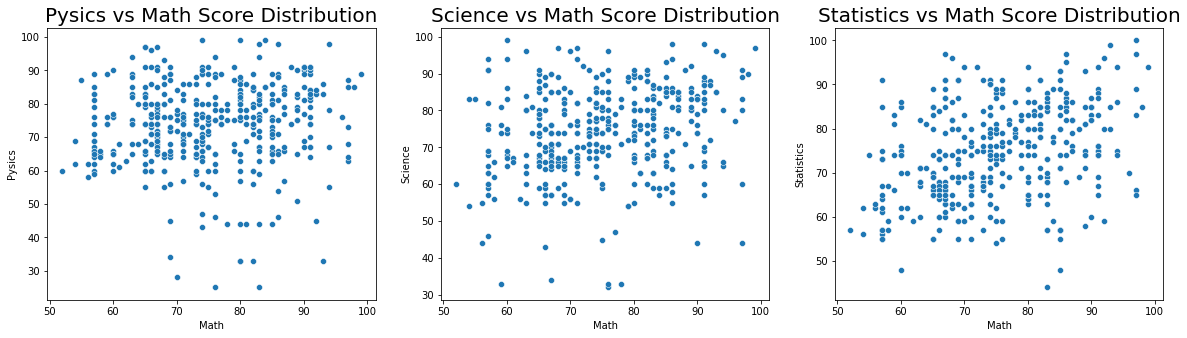

In [17]:
fig, ax=plt.subplots(1,3 ,figsize=(20,5))
sns.scatterplot(data=data, x='Math' , y='Pysics', ax=ax[0])
ax[0].set_title("Pysics vs Math Score Distribution", size=20)
sns.scatterplot(data=data, x='Math' , y='Science', ax=ax[1])
ax[1].set_title("Science vs Math Score Distribution", size=20)
sns.scatterplot(data=data, x='Math' , y='Statistics', ax=ax[2])
ax[2].set_title("Statistics vs Math Score Distribution", size=20)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.close(0)
plt.show()

In [18]:
data = pd.get_dummies(data)
labels=['Pysics', 'Science', 'Statistics']
feats=['Math', 'Statistics', 'Science', 'Pysics']

le = LabelEncoder()
le_data = data.copy()
for col in feats:
    le_data[col] = le.fit_transform(data[col])
    
train = le_data

In [19]:
x = train[labels]
y = train['Math']

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [21]:
RF = RandomForestRegressor(criterion='mse', min_samples_leaf=6,
                      n_estimators=500, random_state=100, n_jobs=-1)
RF.fit(x_train, y_train)

y_train_pred_RF = RF.predict(x_train)
y_val_pred_RF = RF.predict(x_val)

r2_score_RF_train = r2_score(y_train, y_train_pred_RF)
r2_score_RF_val = r2_score(y_val, y_val_pred_RF)
rmse_RF = np.sqrt(mean_squared_error(y_val, y_val_pred_RF))

print('R2_score (train): ', r2_score_RF_train)
print('R2_score (test): ', r2_score_RF_val)
print("RMSE: ", rmse_RF)

R2_score (train):  0.44341929681858916
R2_score (test):  0.2327928706250545
RMSE:  9.16717996433382


Text(0, 0.5, 'Math')

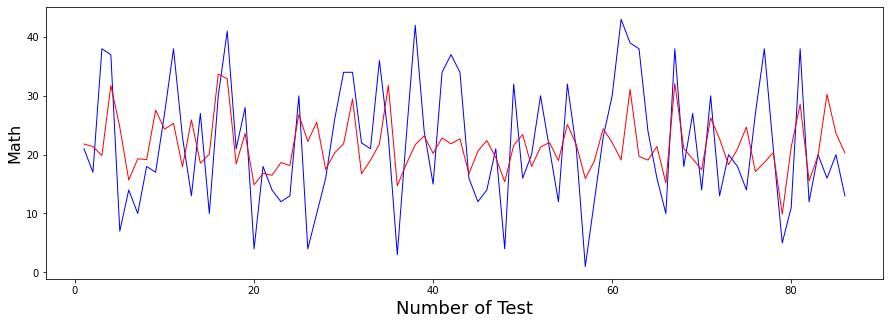

In [22]:
plt.figure(figsize=[15,5])

c = [i for i in range(1,87,1)]
d = [i for i in range(1,87,1)]

plt.plot(c, y_val, color="blue", linewidth=1, linestyle="-")
plt.plot(d, y_val_pred_RF, color="red",  linewidth=1, linestyle="-")
plt.xlabel('Number of Test', fontsize=18) 
plt.ylabel('Math', fontsize=16)

In [23]:
y_val = y_val.ravel()
actualvspredicted = pd.DataFrame({"Actual":y_val,"Predicted":y_val_pred_RF, 'Different':y_val-y_val_pred_RF})
actualvspredicted.head(10).style.background_gradient(cmap='YlGn')

,Actual,Predicted,Different
0,21,21.816283,-0.816283
1,17,21.375700,-4.375700
2,38,19.850513,18.149487
3,37,31.767923,5.232077
4,7,24.669425,-17.669425
5,14,15.675196,-1.675196
6,10,19.291940,-9.291940
7,18,19.172818,-1.172818
8,17,27.570018,-10.570018
9,27,24.335820,2.664180


<Figure size 576x432 with 0 Axes>

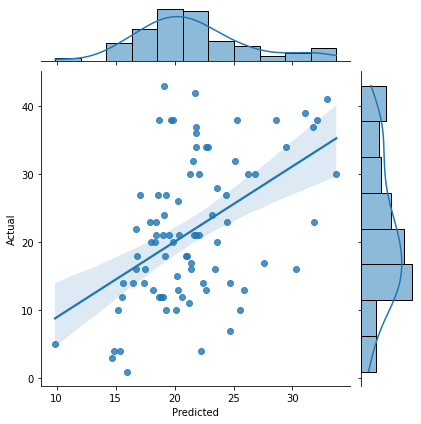

In [24]:
plt.figure(figsize=[8,6])
p = sns.jointplot(actualvspredicted['Predicted'],actualvspredicted['Actual'], kind='reg')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
def shap_and_feature_importance(X, y, features):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=100)
    RF = RandomForestRegressor(criterion='mse', min_samples_leaf=3, min_samples_split=5,
                               n_estimators=500, random_state=0)
    RF.fit(x_train, y_train)    
    # create object that can calculate shap values
    explainer = shap.TreeExplainer(RF)
    # calculate Shap values
    shap_values = explainer.shap_values(x_train)
    shap.summary_plot(shap_values, x_train, feature_names=features, plot_type="bar")
    # shap summary plot
    shap.summary_plot(shap_values, x_train, feature_names=features)    
    return 

Feature importance and SHAP summary for Math score


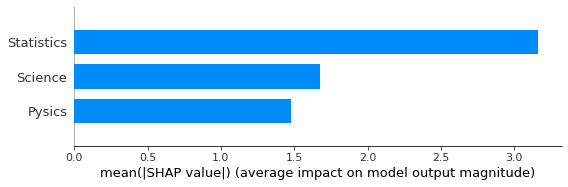

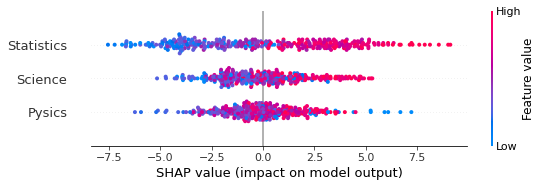

None


In [26]:
    print('Feature importance and SHAP summary for Math score')
    print(shap_and_feature_importance(x, y, features=labels))